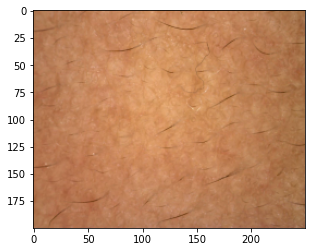

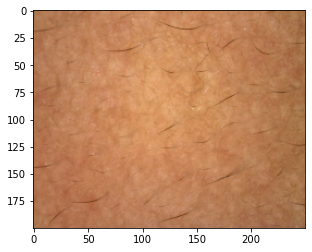

Color Information
{'cluster_index': 2,
 'color': [196.8001390337157, 133.34793187347938, 90.84836635384077],
 'color_percentage': 0.23322}

{'cluster_index': 5,
 'color': [186.02824086726793, 124.89414229753122, 84.87136740457318],
 'color_percentage': 0.21814}

{'cluster_index': 0,
 'color': [175.05490348239434, 116.40799301581117, 77.37181103889807],
 'color_percentage': 0.205}

{'cluster_index': 4,
 'color': [207.27497954890765, 143.0358770597169, 96.64041135912116],
 'color_percentage': 0.17114}

{'cluster_index': 1,
 'color': [218.42312894499585, 155.2479711451757, 106.14562669071273],
 'color_percentage': 0.08872}

{'cluster_index': 3,
 'color': [162.18561595062923, 106.33467837645371, 67.49584619036321],
 'color_percentage': 0.08378}

Color Bar


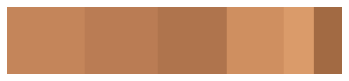

Category:  brown
[20.80013903 31.34793187 34.84836635]


In [1]:
import numpy as np
import cv2
import imutils
from sklearn.cluster import KMeans
from collections import Counter
import pprint
from matplotlib import pyplot as plt


def extractSkin(image):
    img = image.copy()

    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    lower_threshold = np.array([0, 48, 80], dtype=np.uint8)
    upper_threshold = np.array([20, 255, 255], dtype=np.uint8)

    skinMask = cv2.inRange(img, lower_threshold, upper_threshold)

    skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)

    skin = cv2.bitwise_and(img, img, mask=skinMask)

    return cv2.cvtColor(skin, cv2.COLOR_HSV2BGR)


def removeBlack(estimator_labels, estimator_cluster):

    hasBlack = False

    occurance_counter = Counter(estimator_labels)

    def compare(x, y): return Counter(x) == Counter(y)

    for x in occurance_counter.most_common(len(estimator_cluster)):

        color = [int(i) for i in estimator_cluster[x[0]].tolist()]

        if compare(color, [0, 0, 0]) == True:

            del occurance_counter[x[0]]

            hasBlack = True
            estimator_cluster = np.delete(estimator_cluster, x[0], 0)
            break

    return (occurance_counter, estimator_cluster, hasBlack)


def getColorInformation(estimator_labels, estimator_cluster, hasThresholding=False):
    occurance_counter = None

    # Output list variable to return
    colorInformation = []

    # Check for Black
    hasBlack = False

    # If a mask has be applied, remove th black
    if hasThresholding == True:

        (occurance, cluster, black) = removeBlack(
            estimator_labels, estimator_cluster)
        occurance_counter = occurance
        estimator_cluster = cluster
        hasBlack = black

    else:
        occurance_counter = Counter(estimator_labels)

    # Get the total sum of all the predicted occurances
    totalOccurance = sum(occurance_counter.values())

    # Loop through all the predicted colors
    for x in occurance_counter.most_common(len(estimator_cluster)):

        index = (int(x[0]))

        # Quick fix for index out of bound when there is no threshold
        index = (index-1) if ((hasThresholding & hasBlack)
                              & (int(index) != 0)) else index

        # Get the color number into a list
        color = estimator_cluster[index].tolist()

        # Get the percentage of each color
        color_percentage = (x[1]/totalOccurance)

        # make the dictionay of the information
        colorInfo = {"cluster_index": index, "color": color,
                     "color_percentage": color_percentage}

        # Add the dictionary to the list
        colorInformation.append(colorInfo)

    return colorInformation


def extractDominantColor(image, number_of_colors=5, hasThresholding=False):

    if hasThresholding == True:
        number_of_colors += 1

    img = image.copy()

    # Convert Image into RGB Colours Space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Reshape Image
    img = img.reshape((img.shape[0]*img.shape[1]), 3)

    # Initiate KMeans Object
    estimator = KMeans(n_clusters=number_of_colors, random_state=0)

    # Fit the image
    estimator.fit(img)

    # Get Colour Information
    colorInformation = getColorInformation(
        estimator.labels_, estimator.cluster_centers_, hasThresholding)
    return colorInformation


def plotColorBar(colorInformation):
    # Create a 500x100 black image
    color_bar = np.zeros((100, 500, 3), dtype="uint8")

    top_x = 0
    for x in colorInformation:
        bottom_x = top_x + (x["color_percentage"] * color_bar.shape[1])

        color = tuple(map(int, (x['color'])))

        cv2.rectangle(color_bar, (int(top_x), 0),
                      (int(bottom_x), color_bar.shape[0]), color, -1)
        top_x = bottom_x
    return color_bar


def prety_print_data(color_info):
    for x in color_info:
        print(pprint.pformat(x))
        print()


image = cv2.imread("testingImages/skin2.png")

# Resize image to a width of 250
image = imutils.resize(image, width=250)

# Show image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Apply Skin Mask
skin = extractSkin(image)

plt.imshow(cv2.cvtColor(skin, cv2.COLOR_BGR2RGB))
plt.show()

# Find the dominant color
dominantColors = extractDominantColor(skin, hasThresholding=True)

# Show the dominant color information
print("Color Information")
prety_print_data(dominantColors)

# Show the dominant color as a bar
print("Color Bar")
colour_bar = plotColorBar(dominantColors)
plt.axis("off")
plt.imshow(colour_bar)
plt.show()

group_array = [ {'color':[249, 192, 185], 'category':'white'}, 
               {'color':[233, 187, 102], 'category':'white'}, 
               {'color':[176, 102, 56], 'category':'brown'}, 
               {'color':[141, 80, 41], 'category':'brown'}, 
               {'color':[121, 50, 5], 'category':'dark'}, 
               {'color':[49, 26, 28], 'category':'dark'}]


for i in range(len(group_array)):
    result = abs((dominantColors[0]['color']) - np.array(group_array[i]['color']))
    count = 0
    for j in result:
        if j < 50:
            count += 1
    if count == 3:
        print("Category: ", group_array[i]['category'])
        print(result)
        
    

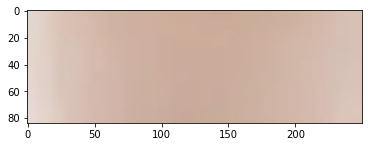

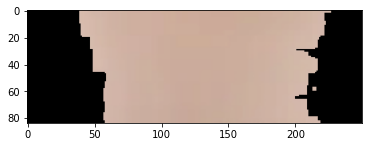

Color Information
{'cluster_index': 1,
 'color': [203.125181950509, 171.73071324599707, 154.97288937408968],
 'color_percentage': 0.39863639660549793}

{'cluster_index': 4,
 'color': [205.09804593760754, 175.2063764141236, 159.06547823105927],
 'color_percentage': 0.21157612243417712}

{'cluster_index': 0,
 'color': [207.08206106870267, 177.6860687022897, 163.0248091603055],
 'color_percentage': 0.15202727206789005}

{'cluster_index': 2,
 'color': [209.72094163805826, 181.7905836194209, 167.19617459539018],
 'color_percentage': 0.1478929426271125}

{'cluster_index': 3,
 'color': [212.57142857142873, 185.01694915254222, 171.5391444713481],
 'color_percentage': 0.0898672662653224}

Color Bar


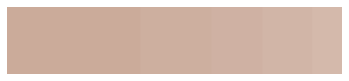

Category:  white
[45.87481805 20.26928675 30.02711063]


In [2]:
import numpy as np
import cv2
import imutils
from sklearn.cluster import KMeans
from collections import Counter
import pprint
from matplotlib import pyplot as plt


def extractSkin(image):
    img = image.copy()

    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    lower_threshold = np.array([0, 48, 80], dtype=np.uint8)
    upper_threshold = np.array([20, 255, 255], dtype=np.uint8)

    skinMask = cv2.inRange(img, lower_threshold, upper_threshold)

    skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)

    skin = cv2.bitwise_and(img, img, mask=skinMask)

    return cv2.cvtColor(skin, cv2.COLOR_HSV2BGR)


def removeBlack(estimator_labels, estimator_cluster):

    hasBlack = False

    occurance_counter = Counter(estimator_labels)

    def compare(x, y): return Counter(x) == Counter(y)

    for x in occurance_counter.most_common(len(estimator_cluster)):

        color = [int(i) for i in estimator_cluster[x[0]].tolist()]

        if compare(color, [0, 0, 0]) == True:

            del occurance_counter[x[0]]

            hasBlack = True
            estimator_cluster = np.delete(estimator_cluster, x[0], 0)
            break

    return (occurance_counter, estimator_cluster, hasBlack)


def getColorInformation(estimator_labels, estimator_cluster, hasThresholding=False):
    occurance_counter = None

    # Output list variable to return
    colorInformation = []

    # Check for Black
    hasBlack = False

    # If a mask has be applied, remove th black
    if hasThresholding == True:

        (occurance, cluster, black) = removeBlack(
            estimator_labels, estimator_cluster)
        occurance_counter = occurance
        estimator_cluster = cluster
        hasBlack = black

    else:
        occurance_counter = Counter(estimator_labels)

    # Get the total sum of all the predicted occurances
    totalOccurance = sum(occurance_counter.values())

    # Loop through all the predicted colors
    for x in occurance_counter.most_common(len(estimator_cluster)):

        index = (int(x[0]))

        # Quick fix for index out of bound when there is no threshold
        index = (index-1) if ((hasThresholding & hasBlack)
                              & (int(index) != 0)) else index

        # Get the color number into a list
        color = estimator_cluster[index].tolist()

        # Get the percentage of each color
        color_percentage = (x[1]/totalOccurance)

        # make the dictionay of the information
        colorInfo = {"cluster_index": index, "color": color,
                     "color_percentage": color_percentage}

        # Add the dictionary to the list
        colorInformation.append(colorInfo)

    return colorInformation


def extractDominantColor(image, number_of_colors=5, hasThresholding=False):

    if hasThresholding == True:
        number_of_colors += 1

    img = image.copy()

    # Convert Image into RGB Colours Space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Reshape Image
    img = img.reshape((img.shape[0]*img.shape[1]), 3)

    # Initiate KMeans Object
    estimator = KMeans(n_clusters=number_of_colors, random_state=0)

    # Fit the image
    estimator.fit(img)

    # Get Colour Information
    colorInformation = getColorInformation(
        estimator.labels_, estimator.cluster_centers_, hasThresholding)
    return colorInformation


def plotColorBar(colorInformation):
    # Create a 500x100 black image
    color_bar = np.zeros((100, 500, 3), dtype="uint8")

    top_x = 0
    for x in colorInformation:
        bottom_x = top_x + (x["color_percentage"] * color_bar.shape[1])

        color = tuple(map(int, (x['color'])))

        cv2.rectangle(color_bar, (int(top_x), 0),
                      (int(bottom_x), color_bar.shape[0]), color, -1)
        top_x = bottom_x
    return color_bar


def prety_print_data(color_info):
    for x in color_info:
        print(pprint.pformat(x))
        print()


image = cv2.imread("testingImages/skin11.png")

# Resize image to a width of 250
image = imutils.resize(image, width=250)

# Show image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Apply Skin Mask
skin = extractSkin(image)

plt.imshow(cv2.cvtColor(skin, cv2.COLOR_BGR2RGB))
plt.show()

# Find the dominant color
dominantColors = extractDominantColor(skin, hasThresholding=True)

# Show the dominant color information
print("Color Information")
prety_print_data(dominantColors)

# Show the dominant color as a bar
print("Color Bar")
colour_bar = plotColorBar(dominantColors)
plt.axis("off")
plt.imshow(colour_bar)
plt.show()

group_array = [ {'color':[249, 192, 185], 'category':'white'}, 
               {'color':[233, 187, 102], 'category':'white'}, 
               {'color':[176, 102, 56], 'category':'brown'}, 
               {'color':[141, 80, 41], 'category':'brown'}, 
               {'color':[121, 50, 5], 'category':'dark'}, 
               {'color':[49, 26, 28], 'category':'dark'}]


for i in range(len(group_array)):
    result = abs((dominantColors[0]['color']) - np.array(group_array[i]['color']))
    count = 0
    for j in result:
        if j < 50:
            count += 1
    if count == 3:
        print("Category: ", group_array[i]['category'])
        print(result)
        
    

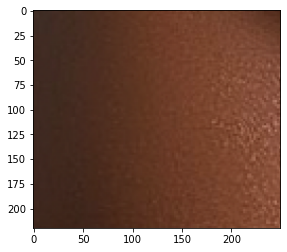

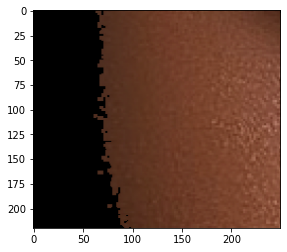

Color Information
{'cluster_index': 0,
 'color': [119.15579126007617, 66.38659312685597, 44.581671616461605],
 'color_percentage': 0.30199701477173296}

{'cluster_index': 1,
 'color': [104.4433293334784, 57.38136795025645, 37.101669030217074],
 'color_percentage': 0.23719697359617067}

{'cluster_index': 4,
 'color': [86.7551939058173, 48.90697137580796, 31.690789473684216],
 'color_percentage': 0.22296566987492922}

{'cluster_index': 3,
 'color': [131.48283200908014, 76.66671396140731, 54.821509648127275],
 'color_percentage': 0.1813783519481188}

{'cluster_index': 2,
 'color': [146.62260711030046, 90.96855059252505, 69.59571558796713],
 'color_percentage': 0.05646198980904833}

Color Bar


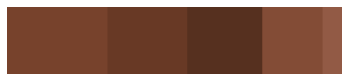

Category:  brown
[21.84420874 13.61340687  3.58167162]
Category:  dark
[ 1.84420874 16.38659313 39.58167162]


In [3]:
import numpy as np
import cv2
import imutils
from sklearn.cluster import KMeans
from collections import Counter
import pprint
from matplotlib import pyplot as plt


def extractSkin(image):
    img = image.copy()

    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    lower_threshold = np.array([0, 48, 80], dtype=np.uint8)
    upper_threshold = np.array([20, 255, 255], dtype=np.uint8)

    skinMask = cv2.inRange(img, lower_threshold, upper_threshold)

    skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)

    skin = cv2.bitwise_and(img, img, mask=skinMask)

    return cv2.cvtColor(skin, cv2.COLOR_HSV2BGR)


def removeBlack(estimator_labels, estimator_cluster):

    hasBlack = False

    occurance_counter = Counter(estimator_labels)

    def compare(x, y): return Counter(x) == Counter(y)

    for x in occurance_counter.most_common(len(estimator_cluster)):

        color = [int(i) for i in estimator_cluster[x[0]].tolist()]

        if compare(color, [0, 0, 0]) == True:

            del occurance_counter[x[0]]

            hasBlack = True
            estimator_cluster = np.delete(estimator_cluster, x[0], 0)
            break

    return (occurance_counter, estimator_cluster, hasBlack)


def getColorInformation(estimator_labels, estimator_cluster, hasThresholding=False):
    occurance_counter = None

    # Output list variable to return
    colorInformation = []

    # Check for Black
    hasBlack = False

    # If a mask has be applied, remove th black
    if hasThresholding == True:

        (occurance, cluster, black) = removeBlack(
            estimator_labels, estimator_cluster)
        occurance_counter = occurance
        estimator_cluster = cluster
        hasBlack = black

    else:
        occurance_counter = Counter(estimator_labels)

    # Get the total sum of all the predicted occurances
    totalOccurance = sum(occurance_counter.values())

    # Loop through all the predicted colors
    for x in occurance_counter.most_common(len(estimator_cluster)):

        index = (int(x[0]))

        # Quick fix for index out of bound when there is no threshold
        index = (index-1) if ((hasThresholding & hasBlack)
                              & (int(index) != 0)) else index

        # Get the color number into a list
        color = estimator_cluster[index].tolist()

        # Get the percentage of each color
        color_percentage = (x[1]/totalOccurance)

        # make the dictionay of the information
        colorInfo = {"cluster_index": index, "color": color,
                     "color_percentage": color_percentage}

        # Add the dictionary to the list
        colorInformation.append(colorInfo)

    return colorInformation


def extractDominantColor(image, number_of_colors=5, hasThresholding=False):

    if hasThresholding == True:
        number_of_colors += 1

    img = image.copy()

    # Convert Image into RGB Colours Space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Reshape Image
    img = img.reshape((img.shape[0]*img.shape[1]), 3)

    # Initiate KMeans Object
    estimator = KMeans(n_clusters=number_of_colors, random_state=0)

    # Fit the image
    estimator.fit(img)

    # Get Colour Information
    colorInformation = getColorInformation(
        estimator.labels_, estimator.cluster_centers_, hasThresholding)
    return colorInformation


def plotColorBar(colorInformation):
    # Create a 500x100 black image
    color_bar = np.zeros((100, 500, 3), dtype="uint8")

    top_x = 0
    for x in colorInformation:
        bottom_x = top_x + (x["color_percentage"] * color_bar.shape[1])

        color = tuple(map(int, (x['color'])))

        cv2.rectangle(color_bar, (int(top_x), 0),
                      (int(bottom_x), color_bar.shape[0]), color, -1)
        top_x = bottom_x
    return color_bar


def prety_print_data(color_info):
    for x in color_info:
        print(pprint.pformat(x))
        print()


image = cv2.imread("testingImages/skin13.png")

# Resize image to a width of 250
image = imutils.resize(image, width=250)

# Show image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Apply Skin Mask
skin = extractSkin(image)

plt.imshow(cv2.cvtColor(skin, cv2.COLOR_BGR2RGB))
plt.show()

# Find the dominant color
dominantColors = extractDominantColor(skin, hasThresholding=True)

# Show the dominant color information
print("Color Information")
prety_print_data(dominantColors)

# Show the dominant color as a bar
print("Color Bar")
colour_bar = plotColorBar(dominantColors)
plt.axis("off")
plt.imshow(colour_bar)
plt.show()

group_array = [ {'color':[249, 192, 185], 'category':'white'}, 
               {'color':[233, 187, 102], 'category':'white'}, 
               {'color':[176, 102, 56], 'category':'brown'}, 
               {'color':[141, 80, 41], 'category':'brown'}, 
               {'color':[121, 50, 5], 'category':'dark'}, 
               {'color':[49, 26, 28], 'category':'dark'}]


for i in range(len(group_array)):
    result = abs((dominantColors[0]['color']) - np.array(group_array[i]['color']))
    count = 0
    for j in result:
        if j < 50:
            count += 1
    if count == 3:
        print("Category: ", group_array[i]['category'])
        print(result)
        
    

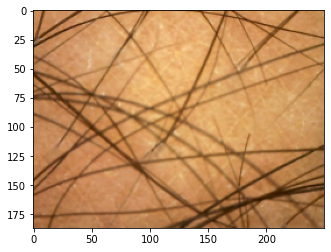

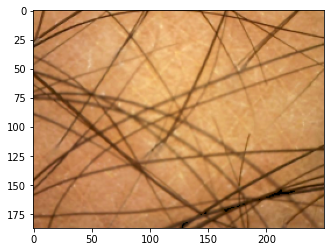

Color Information
{'cluster_index': 1,
 'color': [212.4731786043659, 153.4011681524749, 97.05464186904365],
 'color_percentage': 0.27833155080213906}

{'cluster_index': 4,
 'color': [194.17780182129647, 134.1753674150212, 82.75385447660264],
 'color_percentage': 0.23715508021390375}

{'cluster_index': 3,
 'color': [229.5106017191978, 175.33169054441288, 113.86601719197797],
 'color_percentage': 0.18663101604278076}

{'cluster_index': 0,
 'color': [167.8162363661469, 113.14979980671018, 65.86304017672222],
 'color_percentage': 0.15480213903743315}

{'cluster_index': 2,
 'color': [133.94919786096312, 84.93204099821773, 43.5868983957218],
 'color_percentage': 0.09610695187165776}

{'cluster_index': 5,
 'color': [88.93701506161624, 51.37699680511206, 17.831127339114573],
 'color_percentage': 0.04697326203208556}

Color Bar


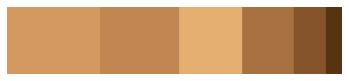

Category:  white
[20.5268214  33.59883185  4.94535813]


In [7]:
import numpy as np
import cv2
import imutils
from sklearn.cluster import KMeans
from collections import Counter
import pprint
from matplotlib import pyplot as plt


def extractSkin(image):
    img = image.copy()

    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    lower_threshold = np.array([0, 48, 80], dtype=np.uint8)
    upper_threshold = np.array([20, 255, 255], dtype=np.uint8)

    skinMask = cv2.inRange(img, lower_threshold, upper_threshold)

    skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)

    skin = cv2.bitwise_and(img, img, mask=skinMask)

    return cv2.cvtColor(skin, cv2.COLOR_HSV2BGR)


def removeBlack(estimator_labels, estimator_cluster):

    hasBlack = False

    occurance_counter = Counter(estimator_labels)

    def compare(x, y): return Counter(x) == Counter(y)

    for x in occurance_counter.most_common(len(estimator_cluster)):

        color = [int(i) for i in estimator_cluster[x[0]].tolist()]

        if compare(color, [0, 0, 0]) == True:

            del occurance_counter[x[0]]

            hasBlack = True
            estimator_cluster = np.delete(estimator_cluster, x[0], 0)
            break

    return (occurance_counter, estimator_cluster, hasBlack)


def getColorInformation(estimator_labels, estimator_cluster, hasThresholding=False):
    occurance_counter = None

    # Output list variable to return
    colorInformation = []

    # Check for Black
    hasBlack = False

    # If a mask has be applied, remove th black
    if hasThresholding == True:

        (occurance, cluster, black) = removeBlack(
            estimator_labels, estimator_cluster)
        occurance_counter = occurance
        estimator_cluster = cluster
        hasBlack = black

    else:
        occurance_counter = Counter(estimator_labels)

    # Get the total sum of all the predicted occurances
    totalOccurance = sum(occurance_counter.values())

    # Loop through all the predicted colors
    for x in occurance_counter.most_common(len(estimator_cluster)):

        index = (int(x[0]))

        # Quick fix for index out of bound when there is no threshold
        index = (index-1) if ((hasThresholding & hasBlack)
                              & (int(index) != 0)) else index

        # Get the color number into a list
        color = estimator_cluster[index].tolist()

        # Get the percentage of each color
        color_percentage = (x[1]/totalOccurance)

        # make the dictionay of the information
        colorInfo = {"cluster_index": index, "color": color,
                     "color_percentage": color_percentage}

        # Add the dictionary to the list
        colorInformation.append(colorInfo)

    return colorInformation


def extractDominantColor(image, number_of_colors=5, hasThresholding=False):

    if hasThresholding == True:
        number_of_colors += 1

    img = image.copy()

    # Convert Image into RGB Colours Space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Reshape Image
    img = img.reshape((img.shape[0]*img.shape[1]), 3)

    # Initiate KMeans Object
    estimator = KMeans(n_clusters=number_of_colors, random_state=0)

    # Fit the image
    estimator.fit(img)

    # Get Colour Information
    colorInformation = getColorInformation(
        estimator.labels_, estimator.cluster_centers_, hasThresholding)
    return colorInformation


def plotColorBar(colorInformation):
    # Create a 500x100 black image
    color_bar = np.zeros((100, 500, 3), dtype="uint8")

    top_x = 0
    for x in colorInformation:
        bottom_x = top_x + (x["color_percentage"] * color_bar.shape[1])

        color = tuple(map(int, (x['color'])))

        cv2.rectangle(color_bar, (int(top_x), 0),
                      (int(bottom_x), color_bar.shape[0]), color, -1)
        top_x = bottom_x
    return color_bar


def prety_print_data(color_info):
    for x in color_info:
        print(pprint.pformat(x))
        print()


image = cv2.imread("testingImages/brwon2.png")

# Resize image to a width of 250
image = imutils.resize(image, width=250)

# Show image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Apply Skin Mask
skin = extractSkin(image)

plt.imshow(cv2.cvtColor(skin, cv2.COLOR_BGR2RGB))
plt.show()

# Find the dominant color
dominantColors = extractDominantColor(skin, hasThresholding=True)

# Show the dominant color information
print("Color Information")
prety_print_data(dominantColors)

# Show the dominant color as a bar
print("Color Bar")
colour_bar = plotColorBar(dominantColors)
plt.axis("off")
plt.imshow(colour_bar)
plt.show()

group_array = [ {'color':[249, 192, 185], 'category':'white'}, 
               {'color':[233, 187, 102], 'category':'white'}, 
               {'color':[176, 102, 56], 'category':'brown'}, 
               {'color':[141, 80, 41], 'category':'brown'}, 
               {'color':[121, 50, 5], 'category':'dark'}, 
               {'color':[49, 26, 28], 'category':'dark'}]


for i in range(len(group_array)):
    result = abs((dominantColors[0]['color']) - np.array(group_array[i]['color']))
    count = 0
    for j in result:
        if j < 50:
            count += 1
    if count == 3:
        print("Category: ", group_array[i]['category'])
        print(result)
        
    